<a href="https://colab.research.google.com/github/hriteesha-2003/hriteesha_ML_intership_codsoft/blob/main/Creditcardfraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def load_data():
    df = pd.read_csv("/content/fraudTrain.csv")
    return df

In [3]:
df = load_data()

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [5]:
# Drop columns
# A few columns seems very little-relevant while predicting if trans is fraud or not
# such as name, job, dob, trans_no
df.drop(['Unnamed: 0', 'first', 'last', 'job', 'dob', 'trans_num', 'city_pop', 'unix_time'], axis=1, inplace=True)
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,36.011293,-82.048315,0.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,49.159047,-118.186462,0.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,43.150704,-112.154481,0.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,47.034331,-112.561071,0.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11701,2019-01-07 20:38:04,4223708906367574214,fraud_Reichert-Weissnat,travel,542.06,M,27718 Mason Bypass,Mount Saint Joseph,OH,45051,39.0965,-84.6431,38.219354,-83.672260,0.0
11702,2019-01-07 20:38:05,3541160328600277,"fraud_O'Reilly, Mohr and Purdy",home,42.50,M,4720 Anna Ways,Murrayville,IL,62668,39.5723,-90.2379,40.564579,-90.378169,0.0
11703,2019-01-07 20:39:07,6011438889172900,fraud_Mohr-Bayer,shopping_net,21.42,F,40624 Rebecca Spurs,De Witt,AR,72042,34.2853,-91.3336,33.644988,-91.317119,0.0
11704,2019-01-07 20:39:27,4509922033272157,fraud_Grimes LLC,entertainment,114.74,F,22084 Smith Roads Suite 776,Hurley,SD,57036,43.2893,-97.1904,43.400960,-96.594169,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11706 entries, 0 to 11705
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  11706 non-null  object 
 1   cc_num                 11706 non-null  int64  
 2   merchant               11706 non-null  object 
 3   category               11706 non-null  object 
 4   amt                    11706 non-null  float64
 5   gender                 11706 non-null  object 
 6   street                 11706 non-null  object 
 7   city                   11706 non-null  object 
 8   state                  11706 non-null  object 
 9   zip                    11706 non-null  int64  
 10  lat                    11706 non-null  float64
 11  long                   11706 non-null  float64
 12  merch_lat              11705 non-null  float64
 13  merch_long             11705 non-null  float64
 14  is_fraud               11705 non-null  float64
dtypes:

In [8]:
df.describe()

,cc_num,amt,zip,lat,long,merch_lat,merch_long,is_fraud
count,1.170600e+04,11706.000000,11706.000000,11706.000000,11706.000000,11705.000000,11705.000000,11705.000000
mean,4.258380e+17,68.760918,49212.270203,38.562065,-90.540940,38.560738,-90.535437,0.004101
std,1.320777e+18,113.379429,27100.223974,5.173634,14.353408,5.199968,14.375129,0.063909
min,6.041621e+10,1.010000,1257.000000,20.027100,-165.672300,19.165823,-166.550779,0.000000
25%,1.800462e+14,9.750000,26041.000000,34.743700,-97.060900,34.831130,-97.161258,0.000000
50%,3.521417e+15,48.495000,48438.000000,39.371600,-87.644300,39.360761,-87.632339,0.000000
75%,4.642255e+15,83.122500,72165.000000,41.846700,-80.158000,41.896736,-80.226861,0.000000
max,4.992346e+18,3178.510000,99783.000000,65.689900,-67.950300,66.645176,-66.967742,1.000000


In [9]:
# check for null
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [10]:
# Check for duplicate
df.duplicated().sum()

0

In [11]:
# Let's see how many merchants are there
merchants = np.unique(df['merchant'])
print(len(merchants))
print(merchants)

693
['fraud_Abbott-Rogahn' 'fraud_Abbott-Steuber' 'fraud_Abernathy and Sons'
 'fraud_Abshire PLC' 'fraud_Adams, Kovacek and Kuhlman'
 'fraud_Adams-Barrows' 'fraud_Altenwerth, Cartwright and Koss'
 'fraud_Altenwerth-Kilback' 'fraud_Ankunding LLC'
 'fraud_Ankunding-Carroll' 'fraud_Armstrong, Walter and Gottlieb'
 'fraud_Auer LLC' 'fraud_Auer-Mosciski' 'fraud_Auer-West'
 'fraud_Bahringer Group' 'fraud_Bahringer, Bergnaum and Quitzon'
 'fraud_Bahringer, Osinski and Block'
 'fraud_Bahringer, Schoen and Corkery' 'fraud_Bahringer-Larson'
 'fraud_Bahringer-Streich' 'fraud_Bailey-Morar' 'fraud_Balistreri-Nader'
 'fraud_Barrows PLC' 'fraud_Bartoletti and Sons' 'fraud_Bartoletti-Wunsch'
 'fraud_Barton Inc' 'fraud_Barton LLC' 'fraud_Bashirian Group'
 'fraud_Bauch-Blanda' 'fraud_Bauch-Raynor' 'fraud_Baumbach Ltd'
 'fraud_Baumbach, Feeney and Morar' 'fraud_Baumbach, Hodkiewicz and Walsh'
 'fraud_Baumbach, Strosin and Nicolas' 'fraud_Bechtelar-Rippin'
 'fraud_Becker, Harris and Harvey' 'fraud_Bednar 

In [12]:
# In what categories is the money spent?
categories = np.unique(df['category'])
print(len(categories))
print(categories)

14
['entertainment' 'food_dining' 'gas_transport' 'grocery_net' 'grocery_pos'
 'health_fitness' 'home' 'kids_pets' 'misc_net' 'misc_pos' 'personal_care'
 'shopping_net' 'shopping_pos' 'travel']


In [13]:
categories_count = df['category'].value_counts()
categories_count

gas_transport     1237
grocery_pos       1153
home              1125
shopping_pos      1037
kids_pets         1001
shopping_net       859
personal_care      837
entertainment      826
food_dining        818
health_fitness     753
misc_pos           671
misc_net           624
grocery_net        410
travel             355
Name: category, dtype: int64

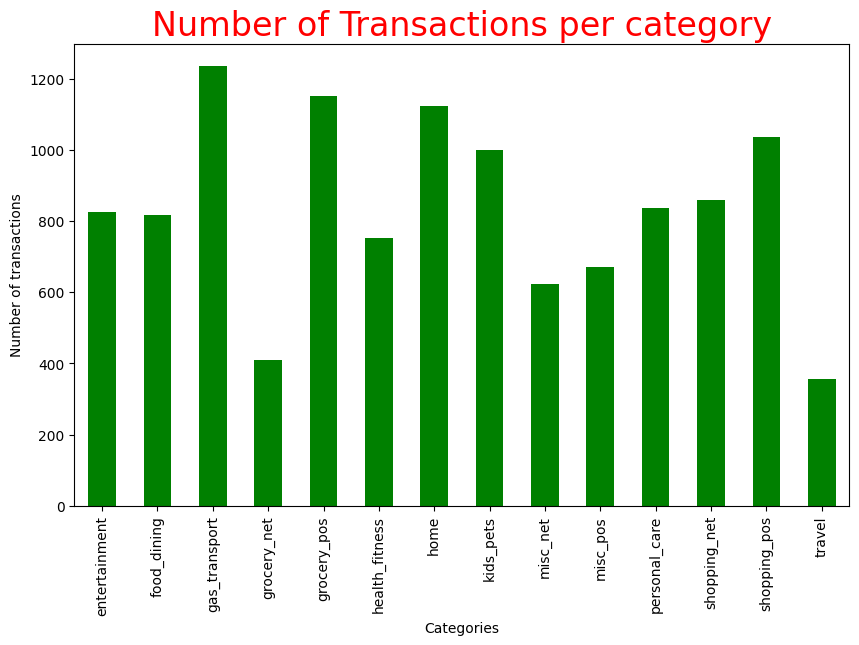

In [14]:
plt.figure(figsize=(10,6))
categories_count.sort_index().plot(kind='bar', color='green')
plt.title("Number of Transactions per category", color='r', fontsize=24)
plt.xlabel("Categories")
plt.ylabel("Number of transactions")
plt.show()

In [15]:
cat_counts = df.groupby(['category','is_fraud'])['is_fraud'].count().unstack()
cat_counts

is_fraud,0.0,1.0
category,,
entertainment,826.0,NaN
food_dining,818.0,NaN
gas_transport,1232.0,5.0
grocery_net,409.0,1.0
grocery_pos,1139.0,14.0
health_fitness,752.0,1.0
home,1125.0,NaN
kids_pets,999.0,1.0
misc_net,618.0,6.0


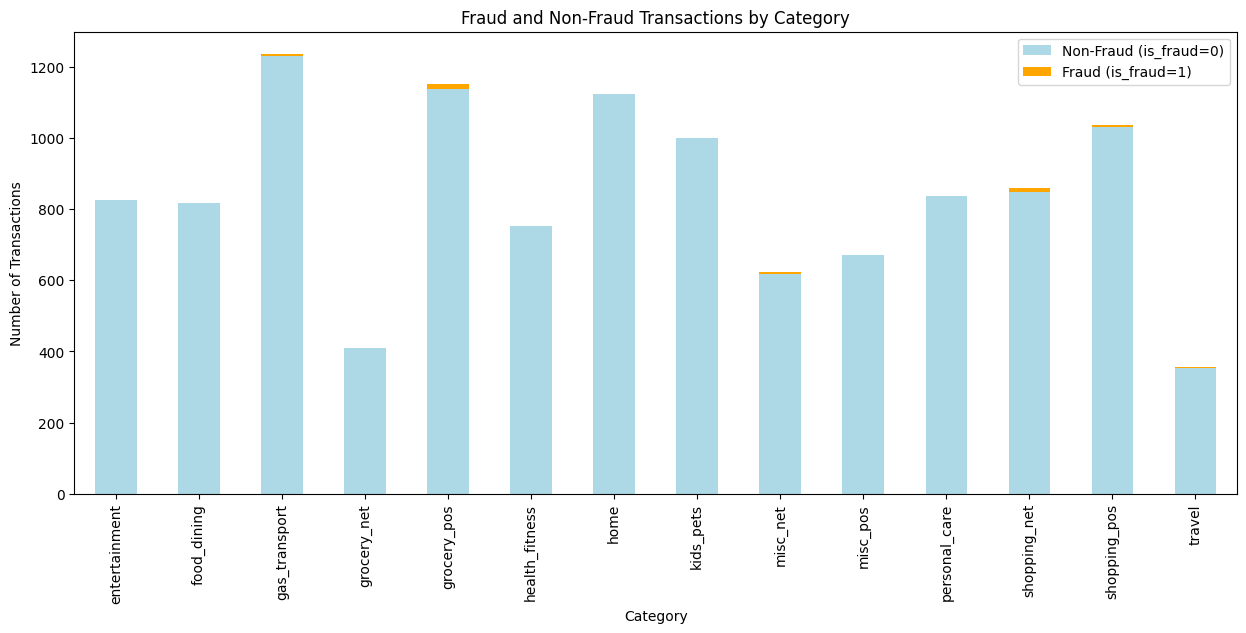

In [16]:
ax = cat_counts.plot(kind='bar', stacked=True, color=['lightblue', 'orange'], figsize=(15, 6))
ax.set_ylabel("Number of Transactions")
ax.set_xlabel("Category")
ax.set_title("Fraud and Non-Fraud Transactions by Category")

# Adding legend
plt.legend(["Non-Fraud (is_fraud=0)", "Fraud (is_fraud=1)"])

# Show the plot
plt.show()

In [17]:
# Let's see about dates

start_date = df['trans_date_trans_time'].min()
end_date = df['trans_date_trans_time'].max()
print(start_date)
print(end_date)

2019-01-01 00:00:18
2019-01-07 20:39:39


In [18]:
# year-month of transaction
df['month_year'] = pd.to_datetime(df['trans_date_trans_time']).dt.to_period('M')

In [19]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,merch_lat,merch_long,is_fraud,month_year
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,36.011293,-82.048315,0.0,2019-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,49.159047,-118.186462,0.0,2019-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,43.150704,-112.154481,0.0,2019-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,47.034331,-112.561071,0.0,2019-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,38.674999,-78.632459,0.0,2019-01


In [22]:
# Let's see how many transactions are there per month
transactions_per_month_year = df['month_year'].value_counts()

print("\nTransactions per Month-Year:")
print(transactions_per_month_year)


Transactions per Month-Year:
2019-01    11706
Freq: M, Name: month_year, dtype: int64


In [21]:
# Mean transaction per month
df.groupby('month_year')['amt'].mean()

month_year
2019-01    68.760918
Freq: M, Name: amt, dtype: float64

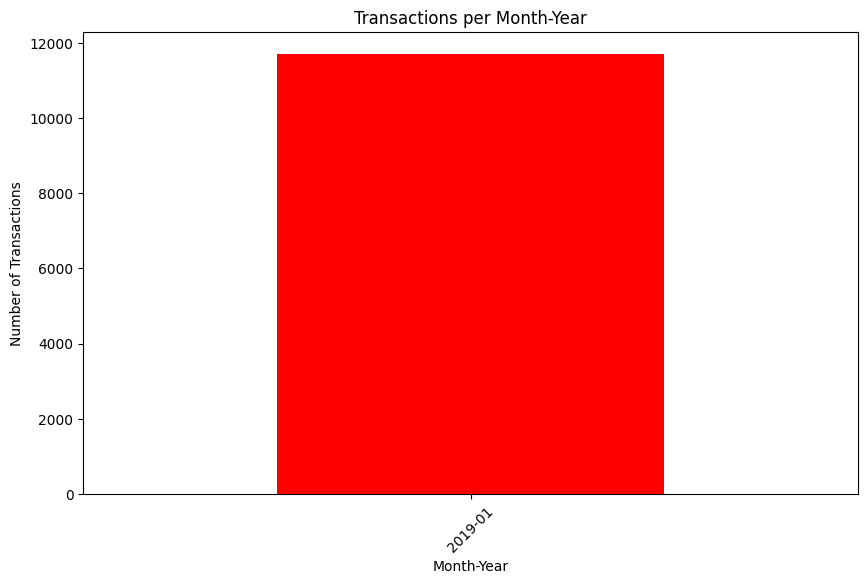

In [23]:
plt.figure(figsize=(10, 6))
transactions_per_month_year.sort_index().plot(kind='bar', color='red')
plt.title('Transactions per Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

In [24]:
trans_per_month = df.groupby(['month_year', 'is_fraud'])['is_fraud'].count().unstack()
trans_per_month

is_fraud,0.0,1.0
month_year,,
2019-01,11657,48


<Axes: xlabel='month_year'>

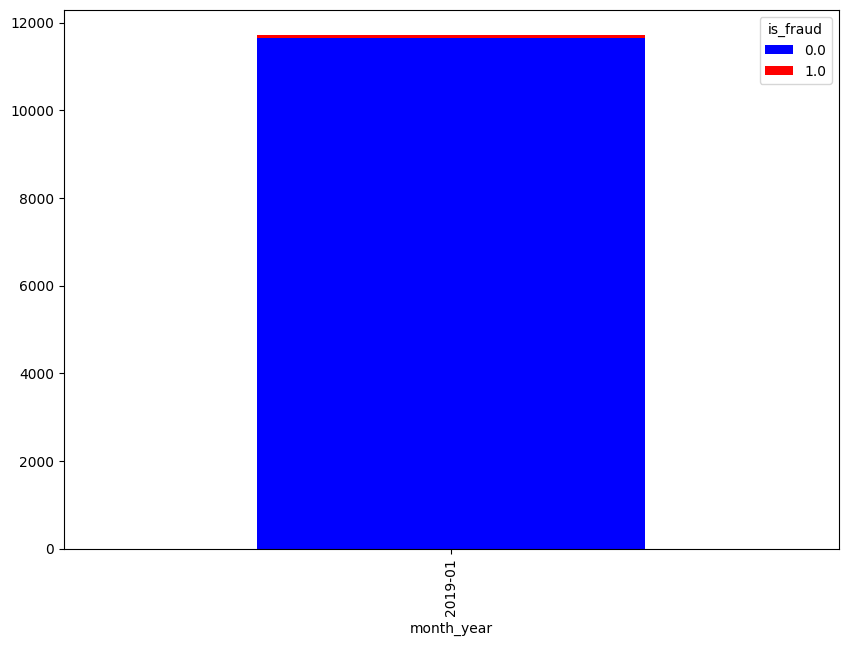

In [25]:
trans_per_month.plot(kind='bar', stacked=True, color=['blue', 'red'], figsize=(10,7))
# ax = cat_counts.plot(kind='bar', stacked=True, color=['lightblue', 'orange'], figsize=(15, 6))

In [27]:
# Gender
gender_count = df['gender'].value_counts()
gender_count

F    6442
M    5264
Name: gender, dtype: int64

<Axes: title={'center': 'Transactions per Gender'}>

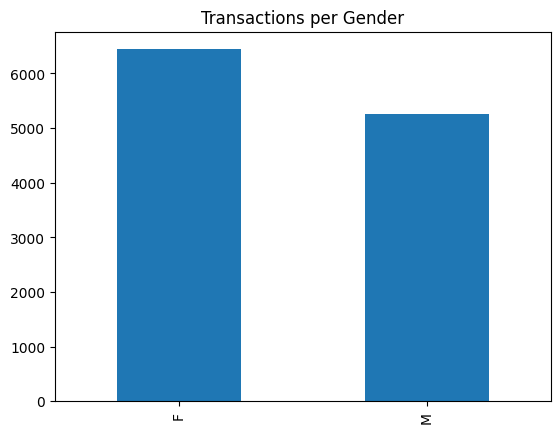

In [28]:
plt.title('Transactions per Gender')
gender_count.plot(kind='bar')

In [29]:
# sum of amount spent by each gender
trans_amount_gender = df.groupby('gender')['amt'].sum()
trans_amount_gender

gender
F    440371.85
M    364543.46
Name: amt, dtype: float64

In [30]:
mean_spent_gender = df.groupby('gender')['amt'].mean()
mean_spent_gender

gender
F    68.359492
M    69.252177
Name: amt, dtype: float64

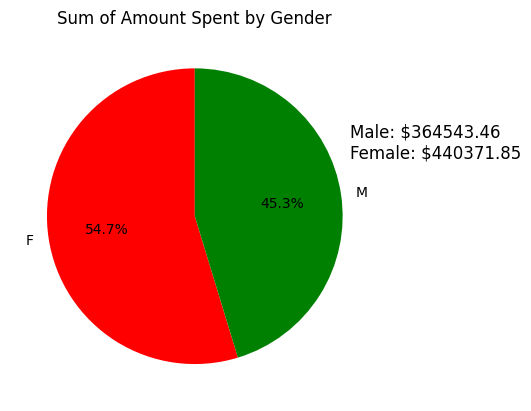

In [31]:
plt.pie(trans_amount_gender, labels=trans_amount_gender.index, autopct='%1.1f%%', colors=['red', 'green'], startangle=90)
plt.gca().set_aspect('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.text(1.05, 0.5, f"Male: ${trans_amount_gender['M']}\nFemale: ${trans_amount_gender['F']}",
         horizontalalignment='left', verticalalignment='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'))

plt.title('Sum of Amount Spent by Gender')
plt.show()

In [32]:
# So, what's the ration of fraud trans
trans_type_count = df['is_fraud'].value_counts()
print(trans_type_count)
print(f"fraud ratio = {trans_type_count[1]/trans_type_count[0]}")

0.0    11657
1.0       48
Name: is_fraud, dtype: int64
fraud ratio = 0.004117697520802951


<Axes: >

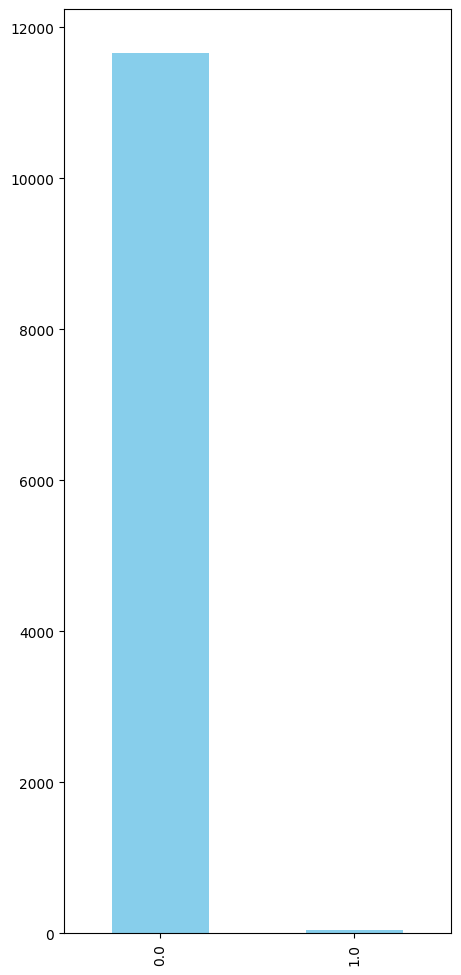

In [33]:
plt.figure(figsize=(5,12))
trans_type_count.plot(kind='bar', color='skyblue')

In [34]:
# Amount spent in fraud and non-fraud trans
spend = df.groupby('is_fraud')['amt'].sum()
print(spend)

is_fraud
0.0    778809.63
1.0     26087.99
Name: amt, dtype: float64


In [35]:
# Mean spent on each
mean_spent = df.groupby('is_fraud')['amt'].mean()
mean_spent

is_fraud
0.0     66.810468
1.0    543.499792
Name: amt, dtype: float64

In [ ]:
# Total cards
cards = np.unique(df['cc_num'])
print(len(cards))

In [37]:
cc_count = df['cc_num'].value_counts()
print(cc_count)

630423337322           42
3576431665303017       40
2720433095629877       39
342952484382519        36
340953839692349        35
                       ..
2358122155477959        1
4373370572092720777     1
3583093681934489        1
3582402971899057        1
570273151375            1
Name: cc_num, Length: 906, dtype: int64


In [38]:
sum = df.groupby('cc_num')['amt'].sum()
sum

cc_num
60416207185             780.21
60422928733             178.00
60423098130              97.27
60427851591             255.39
60487002085               9.37
                        ...   
4958589671582726883     911.37
4973530368125489546     585.55
4980323467523543940      82.64
4989847570577635369    1168.36
4992346398065154184    1064.25
Name: amt, Length: 906, dtype: float64

array([[<Axes: title={'center': 'cc_num'}>,
        <Axes: title={'center': 'amt'}>, <Axes: title={'center': 'zip'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'merch_lat'}>],
       [<Axes: title={'center': 'merch_long'}>,
        <Axes: title={'center': 'is_fraud'}>, <Axes: >]], dtype=object)

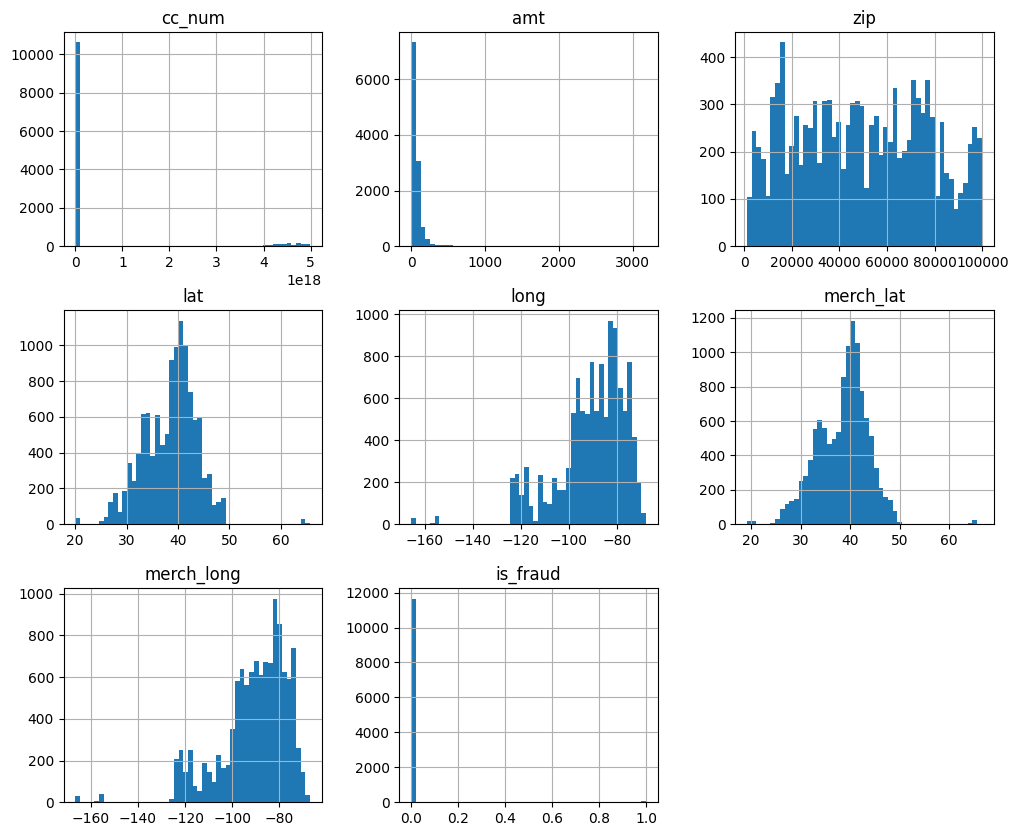

In [39]:
df.hist(bins=50, figsize=(12,10))

<Axes: >

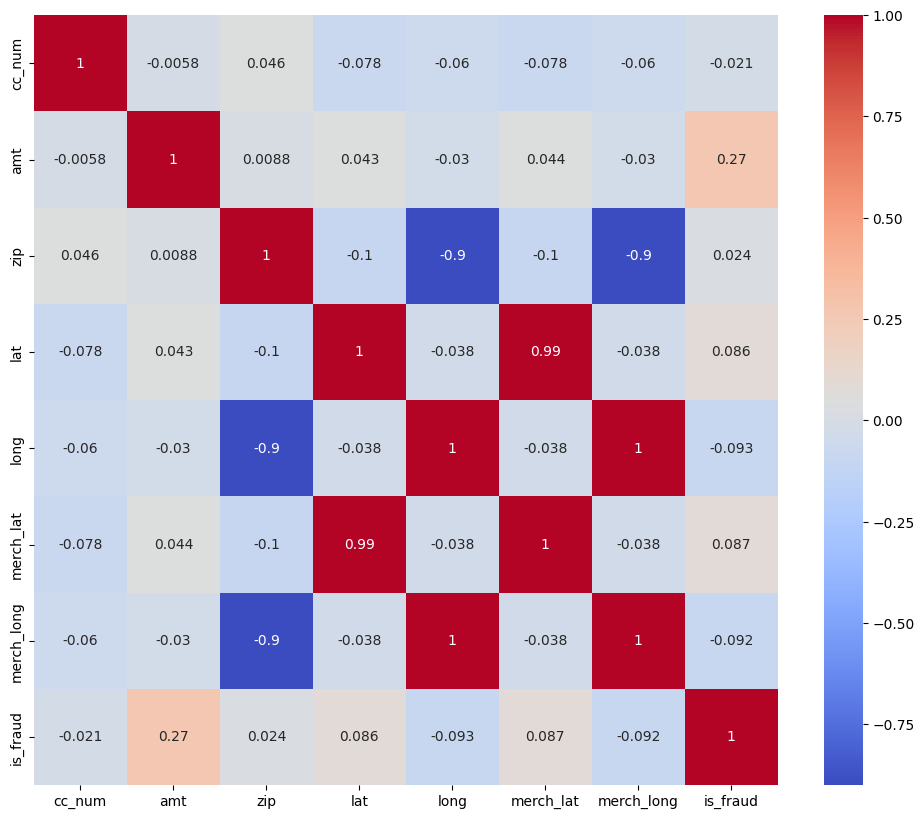

In [40]:
# Correlation heatmap
num_cols = df.select_dtypes(include = ['float64','int64'])
plt.figure(figsize=(12,10))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm' )